In [3]:
import mutils
import extract_spectral as espect
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import cv2
import pandas as pd
import PIL.Image as Image
import numpy as np
import matplotlib.pyplot as plt

# Load relevant functions

In [4]:
def load_xgb_segmentation_model(fp):
    """"
    fp (str): folder path to where the model is located
    """
    clf = xgb.XGBClassifier()
    booster = xgb.Booster()
    booster.load_model(fp)
    clf._Booster = booster
    clf._le = LabelEncoder().fit([0,1,2])

    return clf

def XGBoost_segmentation(image_fp,model):
    test_tif = cv2.imread(image_fp)
    rgb_tif = cv2.cvtColor(test_tif, cv2.COLOR_BGR2RGB)
    df_dict = {c:rgb_tif[:,:,i].flatten() for c,i in zip(['r','g','b'],range(3))}
    df = pd.DataFrame.from_dict(df_dict)
    # y_pred_proba = model.predict_proba(df)
    recon_mask = model.predict(df)
    recon_mask = recon_mask.reshape(rgb_tif.shape[0],rgb_tif.shape[1])
    # masked_img = mask_to_rgb(recon_mask,rgb_tif,classify)
    #evaluate prediction
    
    return recon_mask#,masked_img

# Load model

In [5]:
xgb_model = load_xgb_segmentation_model(r"C:\Users\PAKHUIYING\Documents\Programming\CoastalWQL\CoastalWQL\Models\image_segmentation\xgb_segmentation.json")

# Load image and generate mask

In [6]:
image_fp = r"D:\QAQC\QAQC_plots\1stSur6Apr_F1_RawImg_IMG_0184_1.png"
rgb_img = np.asarray(Image.open(image_fp))
rgb_img = rgb_img[:,:,:3]
mask = XGBoost_segmentation(image_fp,xgb_model)
mask_copy = mask.copy()
mask = mask.reshape(mask.shape[0],mask.shape[1],1)
mask = np.tile(mask,(1,1,3))
print(rgb_img.shape)
print(mask.shape)
print(np.unique(mask)) # where 0 = water, 1 = vessels, 2 = caisson

(919, 1239, 3)
(919, 1239, 3)
[0 1 2]


# Generate masked rgb image

In [7]:
img_mask = rgb_img.copy()
img_mask[mask!=0] = 0 #objects other than water turns to black

# Plot

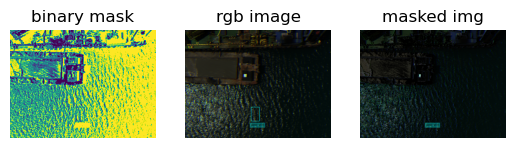

In [8]:
fig, axes = plt.subplots(1,3)
axes[0].imshow(np.where(mask_copy>0,0,1))
axes[1].imshow(rgb_img)
axes[2].imshow(img_mask)
titles = ['binary mask','rgb image', 'masked img']
for i, ax in enumerate(axes):
    ax.axis('off')
    ax.set_title(titles[i])
plt.show()